# 1. 머신러닝 5가지 분류 (SVM, LR, RF, DT, KNN)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

C:\Users\tksmd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tksmd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


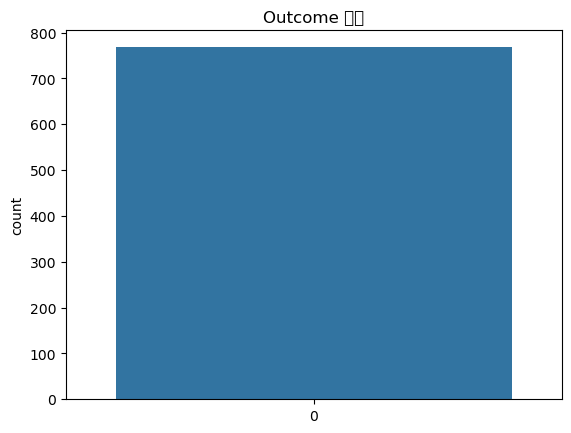

C:\Users\tksmd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tksmd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tksmd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tksmd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tksmd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tksmd\anacond

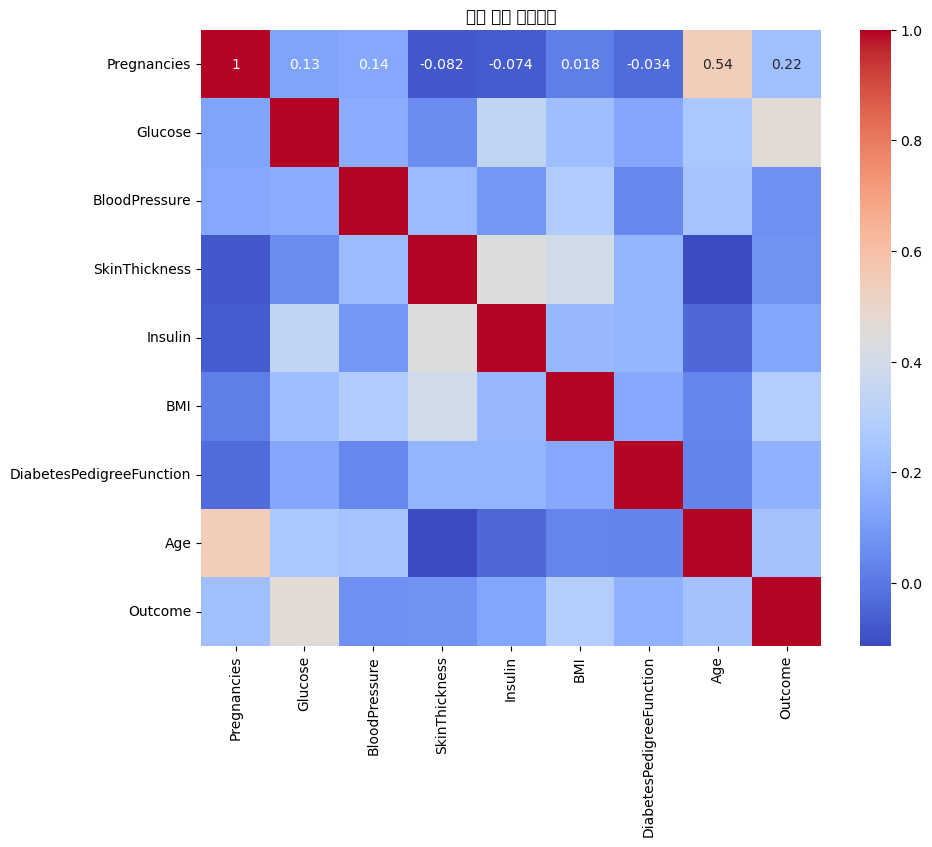

SVM 정확도: 0.7792

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154

SVM Confusion Matrix:
 [[89 10]
 [24 31]]
Logistic Regression 정확도: 0.7792

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84        99
           1       0.78      0.53      0.63        55

    accuracy                           0.78       154
   macro avg       0.78      0.72      0.74       154
weighted avg       0.78      0.78      0.77       154

Logistic Regression Confusion Matrix:
 [[91  8]
 [26 29]]
Random Forest 정확도: 0.7792

Random Forest Classification Report:
               precision    recall  f1-score   support

    

In [8]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 데이터 로드 (GitHub에서 다운로드)
url = 'https://github.com/MyungKyuYi/AI-class/raw/main/diabetes.csv'
data = pd.read_csv(url)

# 1. EDA (탐색적 데이터 분석)
# 데이터 요약
print(data.info())
print(data.describe())

# 결측치 확인
print("결측치 개수:\n", data.isnull().sum())

# 데이터 분포 시각화 (Outcome 열의 분포)
sns.countplot(data['Outcome'])
plt.title('Outcome 분포')
plt.show()

# 상관관계 히트맵
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('특성 간의 상관관계')
plt.show()

# 2. 데이터 전처리
# X는 특성, y는 예측할 레이블 (Outcome)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. 모델 학습 및 평가
# 분류기들 초기화
classifiers = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=2024),
    'Decision Tree': DecisionTreeClassifier(random_state=2024),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# 각 모델 학습 및 평가
for name, clf in classifiers.items():
    # 모델 학습
    clf.fit(X_train, y_train)
    
    # 테스트 데이터에 대한 예측
    y_pred = clf.predict(X_test)
    
    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} 정확도: {accuracy:.4f}")
    
    # 추가적인 평가 지표 출력 (classification report와 confusion matrix)
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("="*60)

